<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9705939	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.9509588	total: 67.8ms	remaining: 33.9s
2:	learn: 0.9309506	total: 71.4ms	remaining: 23.7s
3:	learn: 0.9139138	total: 76.4ms	remaining: 19s
4:	learn: 0.8965963	total: 78.7ms	remaining: 15.7s
5:	learn: 0.8807182	total: 81.3ms	remaining: 13.5s
6:	learn: 0.8632265	total: 83.6ms	remaining: 11.9s
7:	learn: 0.8459242	total: 86ms	remaining: 10.7s
8:	learn: 0.8303101	total: 88.7ms	remaining: 9.76s
9:	learn: 0.8138539	total: 91.1ms	remaining: 9.01s
10:	learn: 0.7988362	total: 93.4ms	remaining: 8.4s
11:	learn: 0.7845679	total: 95.7ms	remaining: 7.88s
12:	learn: 0.7698197	total: 98ms	remaining: 7.44s
13:	learn: 0.7544126	total: 100ms	remaining: 7.07s
14:	learn: 0.7409490	total: 103ms	remaining: 6.76s
15:	learn: 0.7270611	total: 106ms	remaining: 6.5s
16:	learn: 0.7158462	total: 108ms	remaining: 6.26s
17:	learn: 0.7043395	total: 111ms	remaining: 6.04s
18:	learn: 0.6919871	total: 113ms	remaining: 5.86s
19:	lea

39:	learn: 0.5078424	total: 169ms	remaining: 4.06s
40:	learn: 0.5023695	total: 172ms	remaining: 4.03s
41:	learn: 0.4953271	total: 174ms	remaining: 3.98s
42:	learn: 0.4894176	total: 177ms	remaining: 3.94s
43:	learn: 0.4840334	total: 183ms	remaining: 3.98s
44:	learn: 0.4790286	total: 188ms	remaining: 4s
45:	learn: 0.4723657	total: 193ms	remaining: 4s
46:	learn: 0.4672440	total: 195ms	remaining: 3.96s
47:	learn: 0.4620388	total: 198ms	remaining: 3.93s
48:	learn: 0.4582657	total: 200ms	remaining: 3.89s
49:	learn: 0.4543616	total: 203ms	remaining: 3.86s
50:	learn: 0.4490734	total: 206ms	remaining: 3.83s
51:	learn: 0.4450972	total: 208ms	remaining: 3.8s
52:	learn: 0.4413556	total: 211ms	remaining: 3.77s
53:	learn: 0.4385616	total: 213ms	remaining: 3.73s
54:	learn: 0.4340448	total: 216ms	remaining: 3.71s
55:	learn: 0.4298564	total: 218ms	remaining: 3.68s
56:	learn: 0.4269462	total: 221ms	remaining: 3.65s
57:	learn: 0.4229223	total: 223ms	remaining: 3.63s
58:	learn: 0.4193726	total: 226ms	rema

94:	learn: 0.3256888	total: 340ms	remaining: 3.24s
95:	learn: 0.3243337	total: 342ms	remaining: 3.22s
96:	learn: 0.3226732	total: 345ms	remaining: 3.21s
97:	learn: 0.3209892	total: 348ms	remaining: 3.2s
98:	learn: 0.3195057	total: 350ms	remaining: 3.19s
99:	learn: 0.3177159	total: 354ms	remaining: 3.18s
100:	learn: 0.3156365	total: 356ms	remaining: 3.17s
101:	learn: 0.3136398	total: 358ms	remaining: 3.15s
102:	learn: 0.3119807	total: 361ms	remaining: 3.14s
103:	learn: 0.3104017	total: 363ms	remaining: 3.13s
104:	learn: 0.3092539	total: 366ms	remaining: 3.12s
105:	learn: 0.3077231	total: 368ms	remaining: 3.1s
106:	learn: 0.3058606	total: 374ms	remaining: 3.12s
107:	learn: 0.3045115	total: 379ms	remaining: 3.13s
108:	learn: 0.3029885	total: 382ms	remaining: 3.12s
109:	learn: 0.3011141	total: 385ms	remaining: 3.11s
110:	learn: 0.3000007	total: 388ms	remaining: 3.1s
111:	learn: 0.2991006	total: 391ms	remaining: 3.1s
112:	learn: 0.2975607	total: 393ms	remaining: 3.09s
113:	learn: 0.2957146	

146:	learn: 0.2591790	total: 507ms	remaining: 2.94s
147:	learn: 0.2580990	total: 511ms	remaining: 2.94s
148:	learn: 0.2570238	total: 514ms	remaining: 2.93s
149:	learn: 0.2564586	total: 516ms	remaining: 2.92s
150:	learn: 0.2550611	total: 518ms	remaining: 2.91s
151:	learn: 0.2542976	total: 521ms	remaining: 2.9s
152:	learn: 0.2534309	total: 523ms	remaining: 2.9s
153:	learn: 0.2527265	total: 526ms	remaining: 2.89s
154:	learn: 0.2518550	total: 530ms	remaining: 2.89s
155:	learn: 0.2508142	total: 533ms	remaining: 2.88s
156:	learn: 0.2500016	total: 537ms	remaining: 2.88s
157:	learn: 0.2493758	total: 539ms	remaining: 2.88s
158:	learn: 0.2483138	total: 542ms	remaining: 2.87s
159:	learn: 0.2480273	total: 543ms	remaining: 2.85s
160:	learn: 0.2470738	total: 546ms	remaining: 2.84s
161:	learn: 0.2461672	total: 548ms	remaining: 2.83s
162:	learn: 0.2453898	total: 551ms	remaining: 2.83s
163:	learn: 0.2445044	total: 553ms	remaining: 2.82s
164:	learn: 0.2437225	total: 556ms	remaining: 2.81s
165:	learn: 0.

212:	learn: 0.2104264	total: 687ms	remaining: 2.54s
213:	learn: 0.2096085	total: 689ms	remaining: 2.53s
214:	learn: 0.2090281	total: 691ms	remaining: 2.52s
215:	learn: 0.2083533	total: 694ms	remaining: 2.52s
216:	learn: 0.2081736	total: 696ms	remaining: 2.51s
217:	learn: 0.2075271	total: 699ms	remaining: 2.51s
218:	learn: 0.2073347	total: 708ms	remaining: 2.52s
219:	learn: 0.2069625	total: 711ms	remaining: 2.52s
220:	learn: 0.2064244	total: 714ms	remaining: 2.52s
221:	learn: 0.2058941	total: 717ms	remaining: 2.51s
222:	learn: 0.2053256	total: 720ms	remaining: 2.51s
223:	learn: 0.2043687	total: 723ms	remaining: 2.5s
224:	learn: 0.2040626	total: 725ms	remaining: 2.5s
225:	learn: 0.2038345	total: 728ms	remaining: 2.49s
226:	learn: 0.2031671	total: 730ms	remaining: 2.49s
227:	learn: 0.2025716	total: 733ms	remaining: 2.48s
228:	learn: 0.2020104	total: 735ms	remaining: 2.47s
229:	learn: 0.2013690	total: 738ms	remaining: 2.47s
230:	learn: 0.2009082	total: 741ms	remaining: 2.47s
231:	learn: 0.

274:	learn: 0.1814981	total: 859ms	remaining: 2.26s
275:	learn: 0.1812616	total: 862ms	remaining: 2.26s
276:	learn: 0.1809959	total: 870ms	remaining: 2.27s
277:	learn: 0.1804046	total: 873ms	remaining: 2.27s
278:	learn: 0.1798923	total: 881ms	remaining: 2.28s
279:	learn: 0.1793619	total: 884ms	remaining: 2.27s
280:	learn: 0.1788794	total: 886ms	remaining: 2.27s
281:	learn: 0.1784496	total: 888ms	remaining: 2.26s
282:	learn: 0.1781522	total: 891ms	remaining: 2.26s
283:	learn: 0.1775575	total: 893ms	remaining: 2.25s
284:	learn: 0.1772790	total: 896ms	remaining: 2.25s
285:	learn: 0.1769144	total: 898ms	remaining: 2.24s
286:	learn: 0.1764824	total: 901ms	remaining: 2.24s
287:	learn: 0.1761064	total: 903ms	remaining: 2.23s
288:	learn: 0.1756054	total: 905ms	remaining: 2.23s
289:	learn: 0.1751834	total: 908ms	remaining: 2.22s
290:	learn: 0.1750213	total: 910ms	remaining: 2.22s
291:	learn: 0.1743739	total: 913ms	remaining: 2.21s
292:	learn: 0.1739476	total: 916ms	remaining: 2.21s
293:	learn: 

305:	learn: 0.1704171	total: 985ms	remaining: 2.23s
306:	learn: 0.1701955	total: 989ms	remaining: 2.23s
307:	learn: 0.1697883	total: 995ms	remaining: 2.24s
308:	learn: 0.1696958	total: 999ms	remaining: 2.23s
309:	learn: 0.1695497	total: 1s	remaining: 2.23s
310:	learn: 0.1694469	total: 1s	remaining: 2.22s
311:	learn: 0.1691303	total: 1.01s	remaining: 2.22s
312:	learn: 0.1687906	total: 1.01s	remaining: 2.21s
313:	learn: 0.1684266	total: 1.01s	remaining: 2.21s
314:	learn: 0.1680443	total: 1.01s	remaining: 2.2s
315:	learn: 0.1675313	total: 1.01s	remaining: 2.2s
316:	learn: 0.1671687	total: 1.02s	remaining: 2.19s
317:	learn: 0.1666491	total: 1.02s	remaining: 2.19s
318:	learn: 0.1661677	total: 1.02s	remaining: 2.19s
319:	learn: 0.1659835	total: 1.03s	remaining: 2.18s
320:	learn: 0.1654205	total: 1.03s	remaining: 2.18s
321:	learn: 0.1649587	total: 1.03s	remaining: 2.17s
322:	learn: 0.1646750	total: 1.03s	remaining: 2.17s
323:	learn: 0.1643472	total: 1.04s	remaining: 2.16s
324:	learn: 0.163970

347:	learn: 0.1568878	total: 1.14s	remaining: 2.14s
348:	learn: 0.1563503	total: 1.15s	remaining: 2.14s
349:	learn: 0.1561138	total: 1.15s	remaining: 2.13s
350:	learn: 0.1557378	total: 1.15s	remaining: 2.13s
351:	learn: 0.1556562	total: 1.15s	remaining: 2.13s
352:	learn: 0.1553495	total: 1.16s	remaining: 2.12s
353:	learn: 0.1549892	total: 1.16s	remaining: 2.12s
354:	learn: 0.1547398	total: 1.16s	remaining: 2.11s
355:	learn: 0.1543885	total: 1.16s	remaining: 2.11s
356:	learn: 0.1540904	total: 1.17s	remaining: 2.1s
357:	learn: 0.1540265	total: 1.17s	remaining: 2.1s
358:	learn: 0.1536330	total: 1.19s	remaining: 2.12s
359:	learn: 0.1535614	total: 1.19s	remaining: 2.12s
360:	learn: 0.1533960	total: 1.2s	remaining: 2.12s
361:	learn: 0.1532720	total: 1.2s	remaining: 2.11s
362:	learn: 0.1530427	total: 1.2s	remaining: 2.1s
363:	learn: 0.1525670	total: 1.2s	remaining: 2.1s
364:	learn: 0.1523148	total: 1.2s	remaining: 2.1s
365:	learn: 0.1520945	total: 1.21s	remaining: 2.09s
366:	learn: 0.1520026	

398:	learn: 0.1439578	total: 1.32s	remaining: 1.99s
399:	learn: 0.1436188	total: 1.32s	remaining: 1.98s
400:	learn: 0.1434866	total: 1.32s	remaining: 1.98s
401:	learn: 0.1431893	total: 1.32s	remaining: 1.97s
402:	learn: 0.1428105	total: 1.33s	remaining: 1.97s
403:	learn: 0.1426854	total: 1.33s	remaining: 1.96s
404:	learn: 0.1425736	total: 1.33s	remaining: 1.96s
405:	learn: 0.1424999	total: 1.33s	remaining: 1.95s
406:	learn: 0.1424012	total: 1.34s	remaining: 1.96s
407:	learn: 0.1420038	total: 1.34s	remaining: 1.95s
408:	learn: 0.1417497	total: 1.35s	remaining: 1.95s
409:	learn: 0.1413684	total: 1.35s	remaining: 1.95s
410:	learn: 0.1412124	total: 1.35s	remaining: 1.94s
411:	learn: 0.1410654	total: 1.36s	remaining: 1.94s
412:	learn: 0.1408559	total: 1.36s	remaining: 1.93s
413:	learn: 0.1404622	total: 1.36s	remaining: 1.93s
414:	learn: 0.1401561	total: 1.36s	remaining: 1.92s
415:	learn: 0.1398032	total: 1.37s	remaining: 1.92s
416:	learn: 0.1394294	total: 1.37s	remaining: 1.91s
417:	learn: 

449:	learn: 0.1311010	total: 1.48s	remaining: 1.81s
450:	learn: 0.1310370	total: 1.49s	remaining: 1.81s
451:	learn: 0.1306881	total: 1.49s	remaining: 1.8s
452:	learn: 0.1304089	total: 1.49s	remaining: 1.8s
453:	learn: 0.1300396	total: 1.49s	remaining: 1.8s
454:	learn: 0.1296739	total: 1.5s	remaining: 1.79s
455:	learn: 0.1295703	total: 1.5s	remaining: 1.79s
456:	learn: 0.1293887	total: 1.5s	remaining: 1.78s
457:	learn: 0.1291716	total: 1.5s	remaining: 1.78s
458:	learn: 0.1290898	total: 1.51s	remaining: 1.78s
459:	learn: 0.1290187	total: 1.51s	remaining: 1.78s
460:	learn: 0.1288289	total: 1.52s	remaining: 1.77s
461:	learn: 0.1287464	total: 1.52s	remaining: 1.77s
462:	learn: 0.1286248	total: 1.52s	remaining: 1.77s
463:	learn: 0.1283138	total: 1.53s	remaining: 1.76s
464:	learn: 0.1281044	total: 1.53s	remaining: 1.76s
465:	learn: 0.1277288	total: 1.53s	remaining: 1.75s
466:	learn: 0.1276262	total: 1.53s	remaining: 1.75s
467:	learn: 0.1275444	total: 1.54s	remaining: 1.75s
468:	learn: 0.12731

492:	learn: 0.1218506	total: 1.64s	remaining: 1.68s
493:	learn: 0.1216836	total: 1.64s	remaining: 1.68s
494:	learn: 0.1216061	total: 1.64s	remaining: 1.68s
495:	learn: 0.1215280	total: 1.65s	remaining: 1.67s
496:	learn: 0.1214684	total: 1.65s	remaining: 1.67s
497:	learn: 0.1212186	total: 1.65s	remaining: 1.67s
498:	learn: 0.1208944	total: 1.66s	remaining: 1.66s
499:	learn: 0.1205786	total: 1.66s	remaining: 1.66s
500:	learn: 0.1203676	total: 1.66s	remaining: 1.66s
501:	learn: 0.1201011	total: 1.67s	remaining: 1.65s
502:	learn: 0.1198235	total: 1.67s	remaining: 1.65s
503:	learn: 0.1195638	total: 1.67s	remaining: 1.64s
504:	learn: 0.1193658	total: 1.67s	remaining: 1.64s
505:	learn: 0.1191520	total: 1.68s	remaining: 1.64s
506:	learn: 0.1190971	total: 1.68s	remaining: 1.63s
507:	learn: 0.1188933	total: 1.68s	remaining: 1.63s
508:	learn: 0.1187561	total: 1.68s	remaining: 1.62s
509:	learn: 0.1187105	total: 1.69s	remaining: 1.62s
510:	learn: 0.1186752	total: 1.69s	remaining: 1.62s
511:	learn: 

553:	learn: 0.1101829	total: 1.81s	remaining: 1.45s
554:	learn: 0.1099271	total: 1.81s	remaining: 1.45s
555:	learn: 0.1098987	total: 1.81s	remaining: 1.45s
556:	learn: 0.1097933	total: 1.81s	remaining: 1.44s
557:	learn: 0.1094939	total: 1.82s	remaining: 1.44s
558:	learn: 0.1092256	total: 1.82s	remaining: 1.44s
559:	learn: 0.1090106	total: 1.82s	remaining: 1.43s
560:	learn: 0.1088122	total: 1.83s	remaining: 1.43s
561:	learn: 0.1086380	total: 1.83s	remaining: 1.43s
562:	learn: 0.1085966	total: 1.83s	remaining: 1.42s
563:	learn: 0.1085758	total: 1.83s	remaining: 1.42s
564:	learn: 0.1083383	total: 1.84s	remaining: 1.41s
565:	learn: 0.1082209	total: 1.84s	remaining: 1.41s
566:	learn: 0.1081862	total: 1.84s	remaining: 1.41s
567:	learn: 0.1080023	total: 1.84s	remaining: 1.4s
568:	learn: 0.1076794	total: 1.85s	remaining: 1.4s
569:	learn: 0.1075065	total: 1.85s	remaining: 1.4s
570:	learn: 0.1073351	total: 1.85s	remaining: 1.39s
571:	learn: 0.1071357	total: 1.86s	remaining: 1.39s
572:	learn: 0.1

617:	learn: 0.0992049	total: 1.98s	remaining: 1.22s
618:	learn: 0.0989996	total: 1.99s	remaining: 1.23s
619:	learn: 0.0987765	total: 2s	remaining: 1.22s
620:	learn: 0.0986266	total: 2s	remaining: 1.22s
621:	learn: 0.0984176	total: 2s	remaining: 1.22s
622:	learn: 0.0982387	total: 2.01s	remaining: 1.21s
623:	learn: 0.0980099	total: 2.01s	remaining: 1.21s
624:	learn: 0.0977646	total: 2.01s	remaining: 1.21s
625:	learn: 0.0976328	total: 2.02s	remaining: 1.21s
626:	learn: 0.0974389	total: 2.02s	remaining: 1.2s
627:	learn: 0.0972957	total: 2.02s	remaining: 1.2s
628:	learn: 0.0971684	total: 2.03s	remaining: 1.2s
629:	learn: 0.0969991	total: 2.03s	remaining: 1.19s
630:	learn: 0.0968831	total: 2.03s	remaining: 1.19s
631:	learn: 0.0967087	total: 2.04s	remaining: 1.19s
632:	learn: 0.0966187	total: 2.04s	remaining: 1.18s
633:	learn: 0.0964583	total: 2.04s	remaining: 1.18s
634:	learn: 0.0962459	total: 2.05s	remaining: 1.18s
635:	learn: 0.0960272	total: 2.05s	remaining: 1.18s
636:	learn: 0.0959904	to

677:	learn: 0.0896353	total: 2.17s	remaining: 1.03s
678:	learn: 0.0895007	total: 2.17s	remaining: 1.03s
679:	learn: 0.0893530	total: 2.18s	remaining: 1.02s
680:	learn: 0.0891153	total: 2.18s	remaining: 1.02s
681:	learn: 0.0889949	total: 2.19s	remaining: 1.02s
682:	learn: 0.0888245	total: 2.19s	remaining: 1.02s
683:	learn: 0.0886137	total: 2.19s	remaining: 1.01s
684:	learn: 0.0883930	total: 2.2s	remaining: 1.01s
685:	learn: 0.0883257	total: 2.2s	remaining: 1.01s
686:	learn: 0.0881316	total: 2.2s	remaining: 1s
687:	learn: 0.0879451	total: 2.21s	remaining: 1000ms
688:	learn: 0.0878212	total: 2.21s	remaining: 996ms
689:	learn: 0.0877029	total: 2.21s	remaining: 993ms
690:	learn: 0.0875317	total: 2.21s	remaining: 991ms
691:	learn: 0.0873856	total: 2.22s	remaining: 990ms
692:	learn: 0.0871515	total: 2.23s	remaining: 986ms
693:	learn: 0.0870509	total: 2.23s	remaining: 983ms
694:	learn: 0.0867455	total: 2.23s	remaining: 980ms
695:	learn: 0.0866260	total: 2.23s	remaining: 976ms
696:	learn: 0.086

724:	learn: 0.0830969	total: 2.35s	remaining: 890ms
725:	learn: 0.0828615	total: 2.35s	remaining: 887ms
726:	learn: 0.0827072	total: 2.35s	remaining: 883ms
727:	learn: 0.0825615	total: 2.35s	remaining: 880ms
728:	learn: 0.0824325	total: 2.36s	remaining: 877ms
729:	learn: 0.0823964	total: 2.36s	remaining: 873ms
730:	learn: 0.0823251	total: 2.36s	remaining: 870ms
731:	learn: 0.0820940	total: 2.37s	remaining: 866ms
732:	learn: 0.0820351	total: 2.37s	remaining: 864ms
733:	learn: 0.0818436	total: 2.38s	remaining: 861ms
734:	learn: 0.0817705	total: 2.38s	remaining: 858ms
735:	learn: 0.0815825	total: 2.38s	remaining: 855ms
736:	learn: 0.0815472	total: 2.39s	remaining: 852ms
737:	learn: 0.0813818	total: 2.39s	remaining: 849ms
738:	learn: 0.0812645	total: 2.39s	remaining: 845ms
739:	learn: 0.0811490	total: 2.4s	remaining: 842ms
740:	learn: 0.0809601	total: 2.4s	remaining: 838ms
741:	learn: 0.0808047	total: 2.4s	remaining: 835ms
742:	learn: 0.0805939	total: 2.4s	remaining: 831ms
743:	learn: 0.08

788:	learn: 0.0752239	total: 2.53s	remaining: 676ms
789:	learn: 0.0750835	total: 2.53s	remaining: 673ms
790:	learn: 0.0749646	total: 2.53s	remaining: 669ms
791:	learn: 0.0748199	total: 2.54s	remaining: 666ms
792:	learn: 0.0747736	total: 2.54s	remaining: 663ms
793:	learn: 0.0746453	total: 2.54s	remaining: 659ms
794:	learn: 0.0745138	total: 2.54s	remaining: 656ms
795:	learn: 0.0744460	total: 2.55s	remaining: 653ms
796:	learn: 0.0744322	total: 2.55s	remaining: 650ms
797:	learn: 0.0742315	total: 2.56s	remaining: 647ms
798:	learn: 0.0741544	total: 2.56s	remaining: 645ms
799:	learn: 0.0739974	total: 2.57s	remaining: 642ms
800:	learn: 0.0738972	total: 2.57s	remaining: 639ms
801:	learn: 0.0737563	total: 2.57s	remaining: 635ms
802:	learn: 0.0735998	total: 2.58s	remaining: 632ms
803:	learn: 0.0735662	total: 2.58s	remaining: 629ms
804:	learn: 0.0734425	total: 2.58s	remaining: 625ms
805:	learn: 0.0733107	total: 2.58s	remaining: 622ms
806:	learn: 0.0732751	total: 2.59s	remaining: 619ms
807:	learn: 

833:	learn: 0.0705312	total: 2.67s	remaining: 531ms
834:	learn: 0.0704543	total: 2.67s	remaining: 528ms
835:	learn: 0.0703793	total: 2.67s	remaining: 525ms
836:	learn: 0.0702024	total: 2.68s	remaining: 522ms
837:	learn: 0.0701259	total: 2.68s	remaining: 518ms
838:	learn: 0.0699809	total: 2.68s	remaining: 515ms
839:	learn: 0.0698737	total: 2.69s	remaining: 512ms
840:	learn: 0.0697720	total: 2.69s	remaining: 508ms
841:	learn: 0.0696641	total: 2.69s	remaining: 505ms
842:	learn: 0.0696067	total: 2.69s	remaining: 502ms
843:	learn: 0.0694825	total: 2.7s	remaining: 498ms
844:	learn: 0.0693784	total: 2.7s	remaining: 495ms
845:	learn: 0.0692648	total: 2.7s	remaining: 492ms
846:	learn: 0.0691235	total: 2.7s	remaining: 489ms
847:	learn: 0.0690764	total: 2.71s	remaining: 485ms
848:	learn: 0.0690155	total: 2.71s	remaining: 482ms
849:	learn: 0.0688677	total: 2.71s	remaining: 479ms
850:	learn: 0.0687301	total: 2.71s	remaining: 475ms
851:	learn: 0.0686847	total: 2.72s	remaining: 472ms
852:	learn: 0.06

881:	learn: 0.0658586	total: 2.82s	remaining: 378ms
882:	learn: 0.0657241	total: 2.83s	remaining: 375ms
883:	learn: 0.0655903	total: 2.83s	remaining: 371ms
884:	learn: 0.0655304	total: 2.83s	remaining: 368ms
885:	learn: 0.0654053	total: 2.84s	remaining: 365ms
886:	learn: 0.0652501	total: 2.84s	remaining: 362ms
887:	learn: 0.0651516	total: 2.84s	remaining: 358ms
888:	learn: 0.0650810	total: 2.84s	remaining: 355ms
889:	learn: 0.0650172	total: 2.85s	remaining: 352ms
890:	learn: 0.0649762	total: 2.85s	remaining: 349ms
891:	learn: 0.0648268	total: 2.85s	remaining: 346ms
892:	learn: 0.0647108	total: 2.86s	remaining: 342ms
893:	learn: 0.0646746	total: 2.86s	remaining: 339ms
894:	learn: 0.0645569	total: 2.86s	remaining: 336ms
895:	learn: 0.0645152	total: 2.87s	remaining: 333ms
896:	learn: 0.0644750	total: 2.87s	remaining: 330ms
897:	learn: 0.0643621	total: 2.87s	remaining: 326ms
898:	learn: 0.0642494	total: 2.88s	remaining: 323ms
899:	learn: 0.0642190	total: 2.88s	remaining: 320ms
900:	learn: 

931:	learn: 0.0619891	total: 2.99s	remaining: 218ms
932:	learn: 0.0618740	total: 2.99s	remaining: 215ms
933:	learn: 0.0617862	total: 3s	remaining: 212ms
934:	learn: 0.0616965	total: 3s	remaining: 208ms
935:	learn: 0.0616292	total: 3s	remaining: 205ms
936:	learn: 0.0615132	total: 3s	remaining: 202ms
937:	learn: 0.0614551	total: 3s	remaining: 199ms
938:	learn: 0.0613586	total: 3.01s	remaining: 195ms
939:	learn: 0.0613049	total: 3.01s	remaining: 192ms
940:	learn: 0.0612698	total: 3.01s	remaining: 189ms
941:	learn: 0.0612434	total: 3.02s	remaining: 186ms
942:	learn: 0.0611754	total: 3.02s	remaining: 183ms
943:	learn: 0.0610790	total: 3.02s	remaining: 179ms
944:	learn: 0.0609213	total: 3.02s	remaining: 176ms
945:	learn: 0.0607521	total: 3.03s	remaining: 173ms
946:	learn: 0.0606823	total: 3.03s	remaining: 170ms
947:	learn: 0.0605858	total: 3.03s	remaining: 166ms
948:	learn: 0.0605589	total: 3.04s	remaining: 163ms
949:	learn: 0.0604713	total: 3.04s	remaining: 160ms
950:	learn: 0.0603749	total

985:	learn: 0.0577794	total: 3.15s	remaining: 44.7ms
986:	learn: 0.0576865	total: 3.15s	remaining: 41.5ms
987:	learn: 0.0575399	total: 3.15s	remaining: 38.3ms
988:	learn: 0.0575011	total: 3.16s	remaining: 35.1ms
989:	learn: 0.0574665	total: 3.16s	remaining: 31.9ms
990:	learn: 0.0574229	total: 3.16s	remaining: 28.7ms
991:	learn: 0.0573005	total: 3.16s	remaining: 25.5ms
992:	learn: 0.0571644	total: 3.17s	remaining: 22.3ms
993:	learn: 0.0570773	total: 3.17s	remaining: 19.1ms
994:	learn: 0.0570323	total: 3.17s	remaining: 16ms
995:	learn: 0.0570198	total: 3.18s	remaining: 12.8ms
996:	learn: 0.0569048	total: 3.18s	remaining: 9.57ms
997:	learn: 0.0567912	total: 3.18s	remaining: 6.38ms
998:	learn: 0.0567421	total: 3.18s	remaining: 3.19ms
999:	learn: 0.0566916	total: 3.19s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.19259667505504705
ABC Pre-generator MAE 1.0321318191038522


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

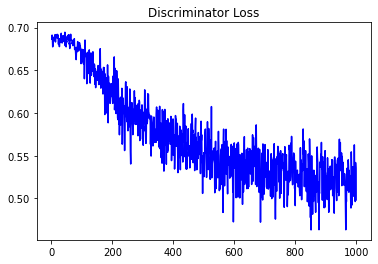

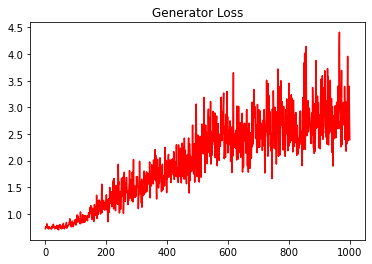

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.19509048144419805


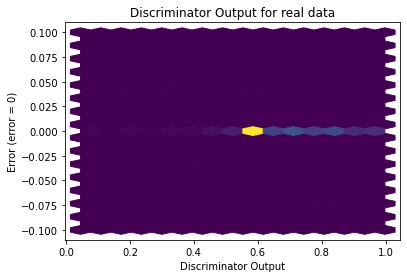

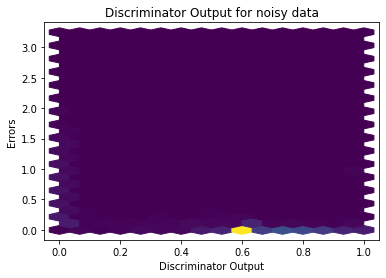

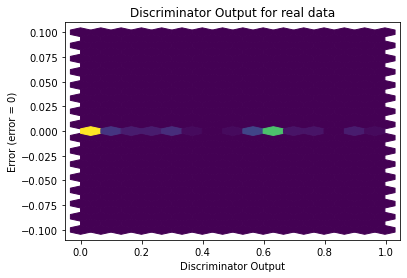

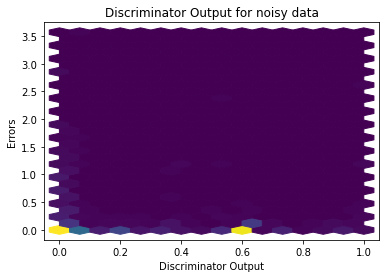

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())